# Chromatic Polynomials
The chromatic polynomial $P(G, k)$ counts the number of ways to color the vertices of a graph $G$ using $k$ colors such that no two adjacent vertices share the same color. This can be computed using the **deletion-contraction recurrence**:

1. If the graph has no edges then $$P(G,k)=k^n$$ where $n$ is the number of vertices.
2. Otherwise, pick an edge $e$ from the graph:
    - **Deletion:** Remove the edge $e$ from the graph to obtain $G\setminus e$.
    - **Contraction:** Merge the two adjacent vertices connected by $e$ into a single vertex (thus removing self-loops) to obtain $G/e$.
    - The chromatic polynomial satisfies $$P(G,k)=P(G\setminus e,k)-P(G/e,k)$$


In [1]:
import networkx as nx
import numpy as np
from sympy import symbols, latex
import matplotlib.pyplot as plt

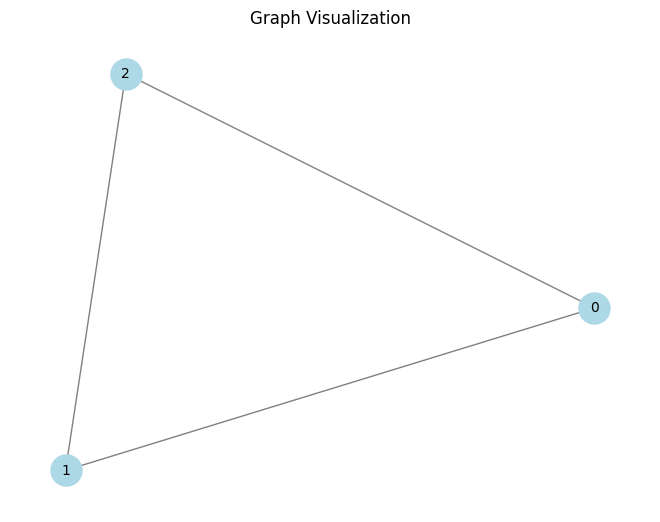

In [2]:
def visualize_graph(G):
    """
    Visualize a graph using networkx and matplotlib.
    
    Parameters:
        G ([networkx.Graph](http://networkx.Graph)): The input graph to visualize.
    """
    # Draw the graph
    pos = nx.spring_layout(G)  # Positions for all nodes
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
    
    # Show the plot
    plt.title("Graph Visualization")
    plt.show()

# Example usage
if __name__ == "__main__":
    # Create a graph
    G = nx.Graph()
    G.add_edges_from([(0, 1), (1, 2), (2, 0)])  # Triangle graph
    
    # Visualize the graph
    visualize_graph(G)

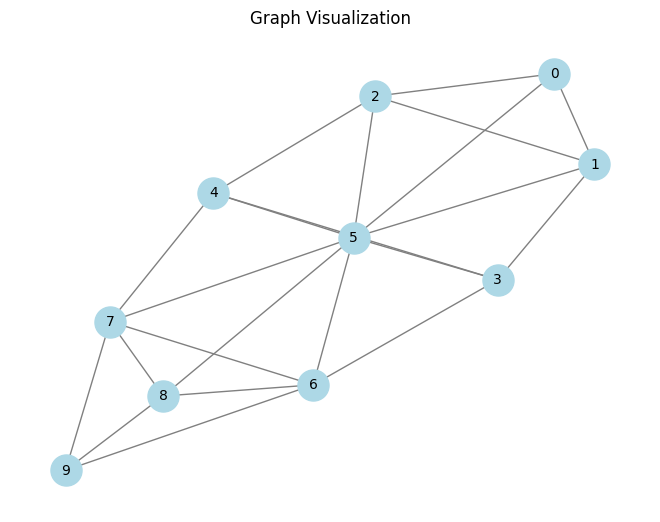

Chromatic Polynomial: k**10 - 22*k**9 + 215*k**8 - 1224*k**7 + 4468*k**6 - 10826*k**5 + 17369*k**4 - 17730*k**3 + 10395*k**2 - 2646*k


In [3]:
def chromatic_polynomial(G):
    """
    Compute the chromatic polynomial of a graph G using the deletion-contraction recurrence.
    
    Parameters:
        G ([networkx.Graph](http://networkx.Graph)): The input graph.
    
    Returns:
        [sympy.Expr](http://sympy.Expr): The chromatic polynomial as a symbolic expression.
    """
    # Base case: If the graph has no edges, the chromatic polynomial is k^n
    if G.number_of_edges() == 0:
        k = symbols('k')
        return k ** G.number_of_nodes()
    
    # Pick an edge (u, v)
    u, v = list(G.edges())[0]
    
    # Deletion: Remove the edge (u, v)
    G_deletion = G.copy()
    G_deletion.remove_edge(u, v)
    
    # Contraction: Merge u and v into a single vertex
    G_contraction = nx.contracted_nodes(G, u, v, self_loops=False)
    
    # Recursive computation
    return chromatic_polynomial(G_deletion) - chromatic_polynomial(G_contraction)

# Example usage
if __name__ == "__main__":
    # Create a graph
    G = nx.Graph()
    G.add_edges_from([(0, 1), (0, 2), (0, 5), (1, 2), (1, 3), (1, 5), (2, 4), (2, 5), 
 (3, 4), (3, 5), (3, 6), (4, 5), (4, 7), (5, 6), (5, 7), (5, 8), 
 (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)])  #  example graph
    visualize_graph(G)
    
    # Compute the chromatic polynomial
    P = chromatic_polynomial(G)
    print("Chromatic Polynomial:", P)

In [4]:
from IPython.display import display, Math

def display_chromatic_polynomial_latex(G):
    P = chromatic_polynomial(G)
    P_latex = latex(P)
    display(Math(f"P(G, k) = {P_latex}"))

# Example usage
if __name__ == "__main__":
    # Create a graph
    G = nx.Graph()
    G.add_edges_from([(0, 1), (0, 2), (0, 5), (1, 2), (1, 3), (1, 5), (2, 4), (2, 5), 
 (3, 4), (3, 5), (3, 6), (4, 5), (4, 7), (5, 6), (5, 7), (5, 8), 
 (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)])  #  example graph
    
    display_chromatic_polynomial_latex(G)

<IPython.core.display.Math object>

In [6]:
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 2)])  # Triangle graph
P = chromatic_polynomial(G)
display_chromatic_polynomial_latex(G)

<IPython.core.display.Math object>